In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/normal/normal/45.4656.csv
/kaggle/input/normal/normal/28.8768.csv
/kaggle/input/normal/normal/37.6832.csv
/kaggle/input/normal/normal/56.7296.csv
/kaggle/input/normal/normal/16.1792.csv
/kaggle/input/normal/normal/32.9728.csv
/kaggle/input/normal/normal/58.7776.csv
/kaggle/input/normal/normal/39.3216.csv
/kaggle/input/normal/normal/44.6464.csv
/kaggle/input/normal/normal/49.5616.csv
/kaggle/input/normal/normal/57.9584.csv
/kaggle/input/normal/normal/34.2016.csv
/kaggle/input/normal/normal/36.4544.csv
/kaggle/input/normal/normal/46.2848.csv
/kaggle/input/normal/normal/51.8144.csv
/kaggle/input/normal/normal/15.1552.csv
/kaggle/input/normal/normal/54.6816.csv
/kaggle/input/normal/normal/48.9472.csv
/kaggle/input/normal/normal/47.7184.csv
/kaggle/input/normal/normal/43.6224.csv
/kaggle/input/normal/normal/20.2752.csv
/kaggle/input/normal/normal/27.4432.csv
/kaggle/input/normal/normal/60.416.csv
/kaggle/input/normal/normal/35.4304.csv
/kaggle/input/normal/normal/40.3456.csv
/

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob
from scipy import stats,signal
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, StackingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import RidgeClassifier
import xgboost as xgb
from xgboost import XGBClassifier

In [3]:
normal_file_names = glob.glob("/kaggle/input/normal/normal/*.csv")
imnormal_file_names_6g = glob.glob("/kaggle/input/imbalance/imbalance/6g/*.csv")
imnormal_file_names_10g = glob.glob("/kaggle/input/imbalance/imbalance/10g/*.csv")
imnormal_file_names_15g = glob.glob("/kaggle/input/imbalance/imbalance/15g/*.csv")
imnormal_file_names_20g = glob.glob("/kaggle/input/imbalance/imbalance/20g/*.csv")
imnormal_file_names_25g = glob.glob("/kaggle/input/imbalance/imbalance/25g/*.csv")
imnormal_file_names_30g = glob.glob("/kaggle/input/imbalance/imbalance/30g/*.csv")
imnormal_file_names_35g = glob.glob("/kaggle/input/imbalance/imbalance/35g/*.csv")

def dataReader(path_names):
    data_n = pd.DataFrame()
    for i in path_names:
        low_data = pd.read_csv(i,header=None)
        data_n = pd.concat([data_n,low_data],ignore_index=True)
    return data_n


# Read data for all file paths
data_normal = dataReader(normal_file_names)
data_6g = dataReader(imnormal_file_names_6g)
data_10g = dataReader(imnormal_file_names_10g)
data_15g = dataReader(imnormal_file_names_15g)
data_20g = dataReader(imnormal_file_names_20g)
data_25g = dataReader(imnormal_file_names_25g)
data_30g = dataReader(imnormal_file_names_30g)
data_35g = dataReader(imnormal_file_names_35g)

In [4]:
data_normal.shape

(12250000, 8)

In [5]:
data_6g.shape

(12250000, 8)

In [6]:
data_30g.shape

(11750000, 8)

In [7]:
features_list = ["Tachometer","UBA_axial","UBA_radial","UBA_tangential","OBA_axial","OBA_radial","OBA_tangential","Microphone"]
data_normal.columns = features_list
data_6g.columns = features_list
data_10g.columns = features_list
data_15g.columns = features_list
data_20g.columns = features_list
data_25g.columns = features_list
data_30g.columns = features_list
data_35g.columns = features_list

In [8]:
data_normal.sample(10)

,Tachometer,UBA_axial,UBA_radial,UBA_tangential,OBA_axial,OBA_radial,OBA_tangential,Microphone
6768427,-0.68238,0.24077,0.360860,0.073332,-0.169170,0.011230,-0.058740,-0.201350
7366241,4.38910,0.18584,0.351080,0.076980,-0.057572,0.012994,-0.060930,-0.276600
2613827,-0.72222,-0.30325,0.161550,0.258920,0.057967,0.026003,0.191980,0.092096
2439323,-0.71142,-0.28911,0.306670,0.082620,-0.021157,0.026439,-0.264860,-0.092385
9102810,-0.74724,0.35603,0.231650,0.608080,0.320150,-0.028475,0.095860,-0.059578
6648479,-0.71068,-0.89290,0.126350,0.198870,0.319780,0.028717,-0.044888,-0.158020
4145383,-0.76982,-0.32464,-0.022501,0.023882,0.075628,0.007694,0.034505,0.289430
9112691,-0.96331,0.43841,0.252450,-0.079250,0.041802,0.026003,0.007302,0.262850
2092183,-0.71338,0.85376,-1.219000,0.137030,0.689220,0.014714,-0.021057,-0.053615
8697341,-0.94609,1.13360,-0.550640,0.112520,-0.084707,-0.037582,-1.040600,-0.018495


In [9]:
data_6g.sample(10)

,Tachometer,UBA_axial,UBA_radial,UBA_tangential,OBA_axial,OBA_radial,OBA_tangential,Microphone
5174990,-0.81379,-0.279530,-0.568370,-0.082956,0.018007,-0.036241,-0.566810,0.224300
2521978,-0.65745,0.696140,0.300590,0.130440,-0.089928,-0.050218,-0.061682,-0.002651
6556758,-0.66984,-1.009900,-0.132020,0.643780,0.050388,0.044472,-0.661520,-0.175600
2485162,-0.66668,0.391620,-0.008972,0.230510,0.047042,0.026279,-0.690700,0.034391
2434655,4.47590,0.013246,-0.788160,-0.273160,0.038321,0.027492,-0.848510,-0.054394
8232409,4.42000,-0.647170,-0.112090,0.112300,0.088171,0.023673,0.188820,-0.022049
6755735,-0.60161,-0.278970,0.187110,-0.328150,-0.027554,0.008772,0.479830,0.119790
11769938,-0.48832,-2.658400,-0.183280,-0.037077,-0.117680,-0.017944,0.175980,0.143300
12083382,-0.75221,-0.768290,0.897720,0.228140,0.033530,-0.003672,0.251080,-0.267330
6647657,-0.68756,-1.712900,-0.055675,0.173820,-0.059229,-0.021480,-0.262630,0.010491


In [10]:
def plot_data(data):
    fig, axs = plt.subplots(8, sharex=False, sharey=False, figsize=(15, 15))
    fig.suptitle('All Features of Normal State')
    
    for idx, col in enumerate(data.columns):
        axs[idx].plot(data[col])  
        axs[idx].set_title(f'{col} Feature')  
    plt.tight_layout()
    plt.show()

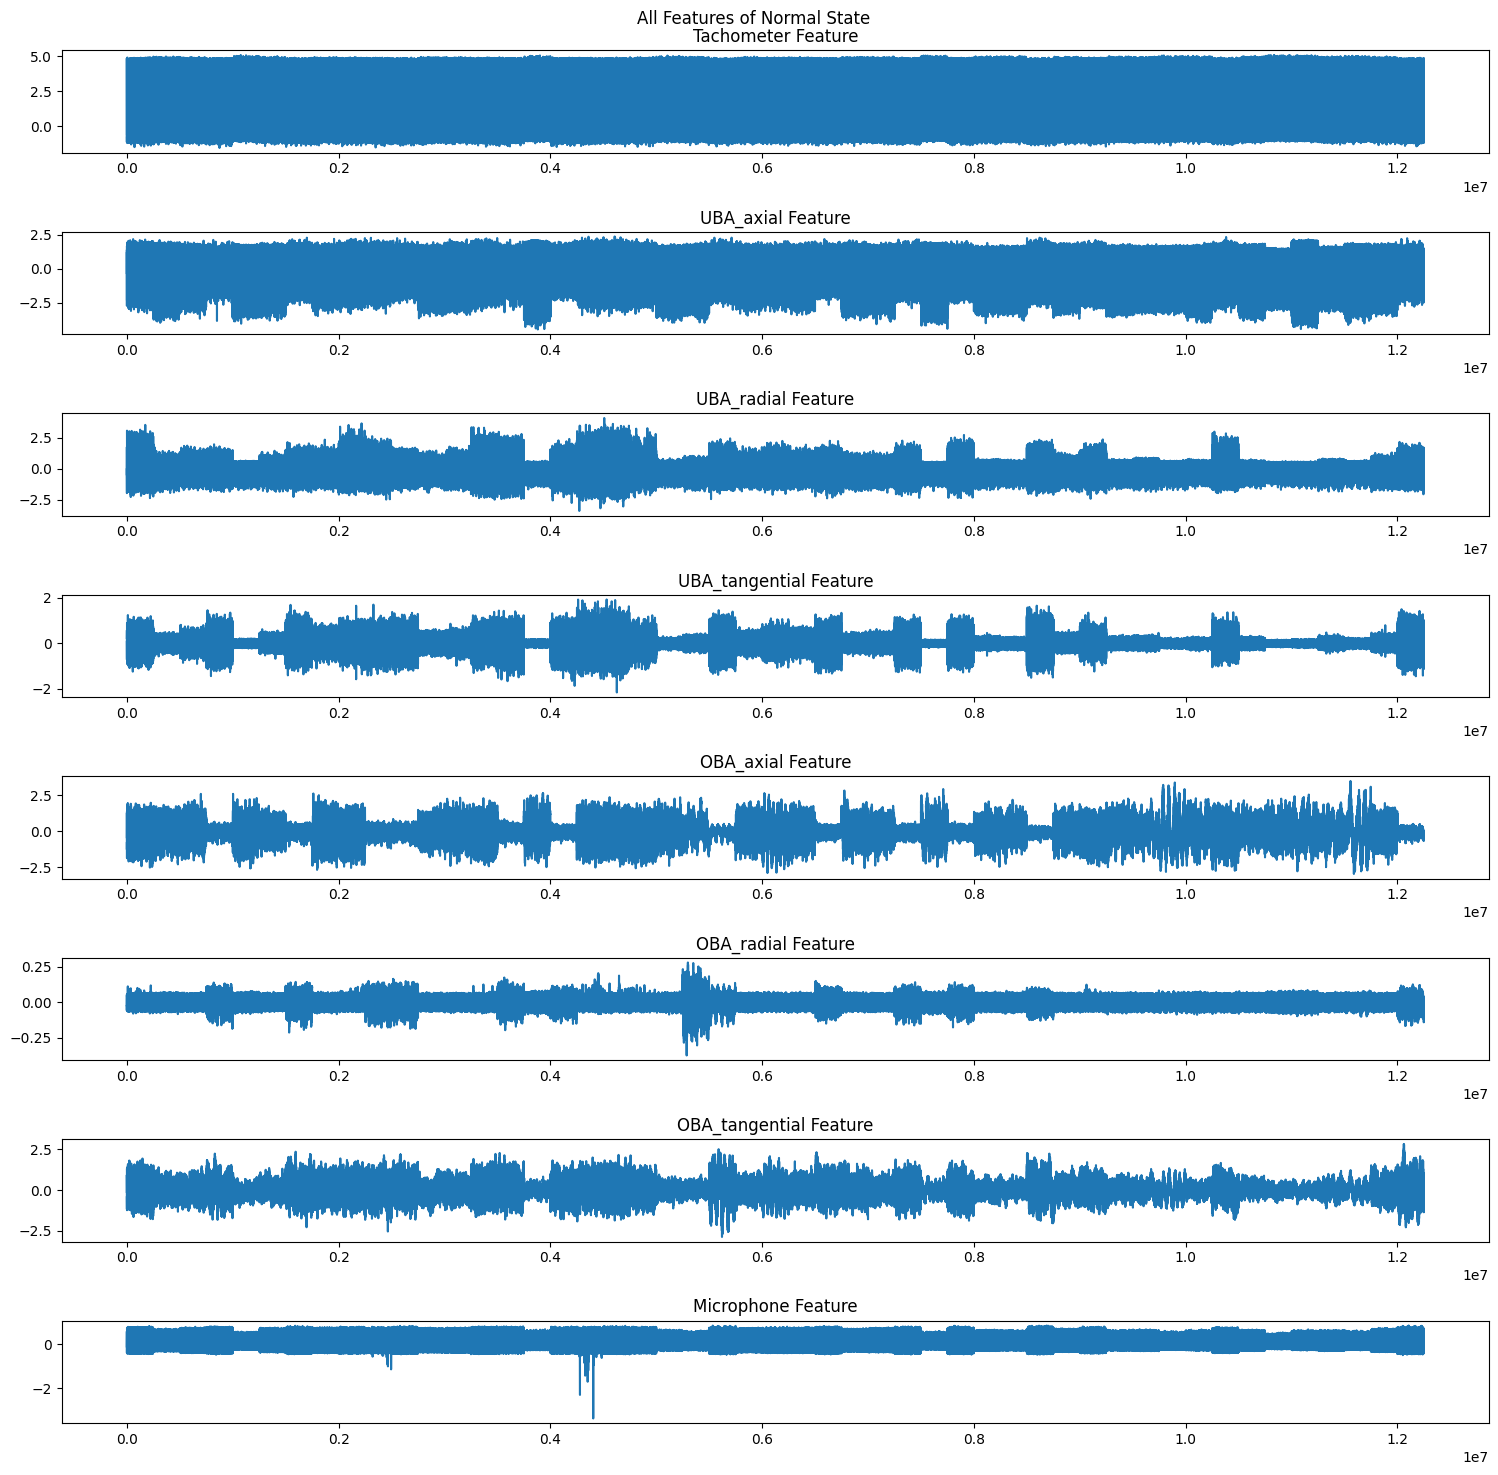

In [11]:
plot_data(data_normal)

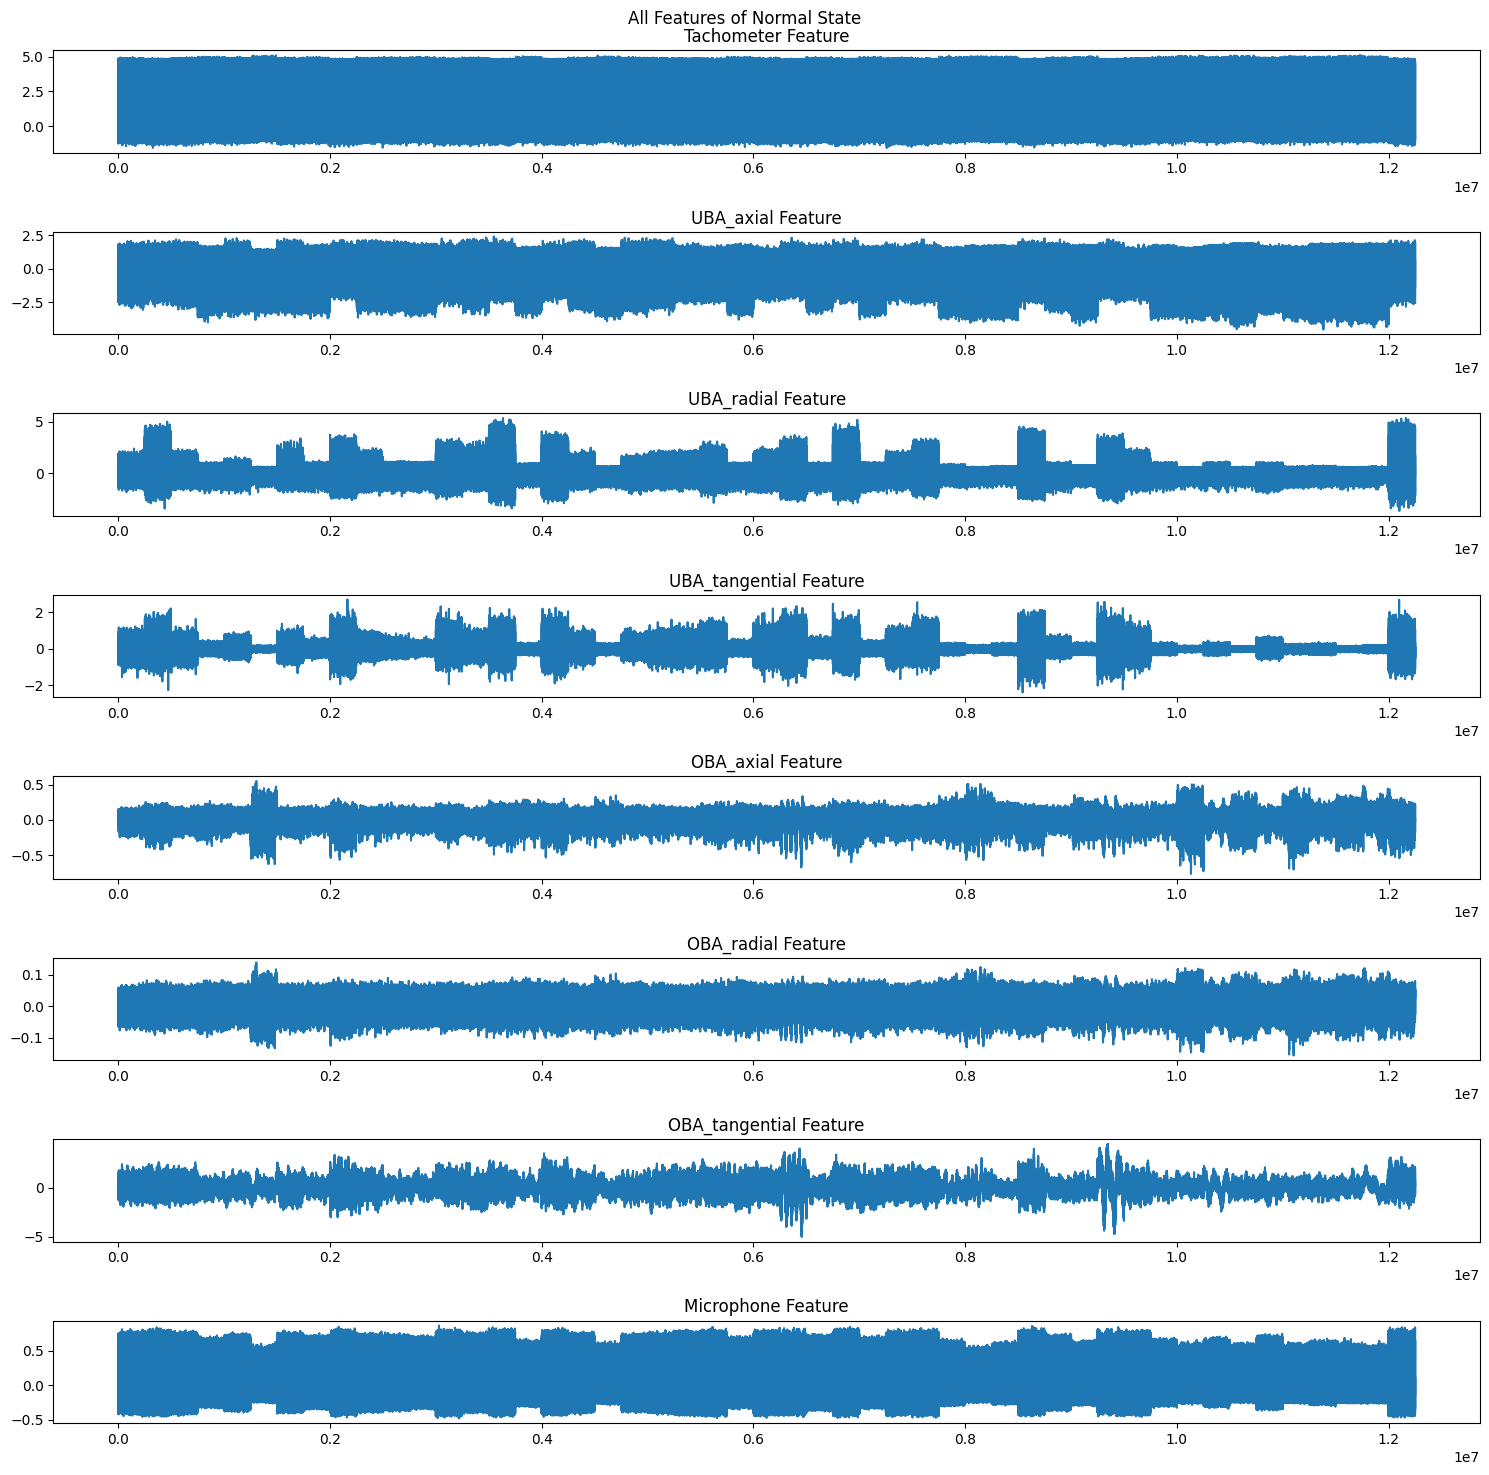

In [12]:
plot_data(data_6g)

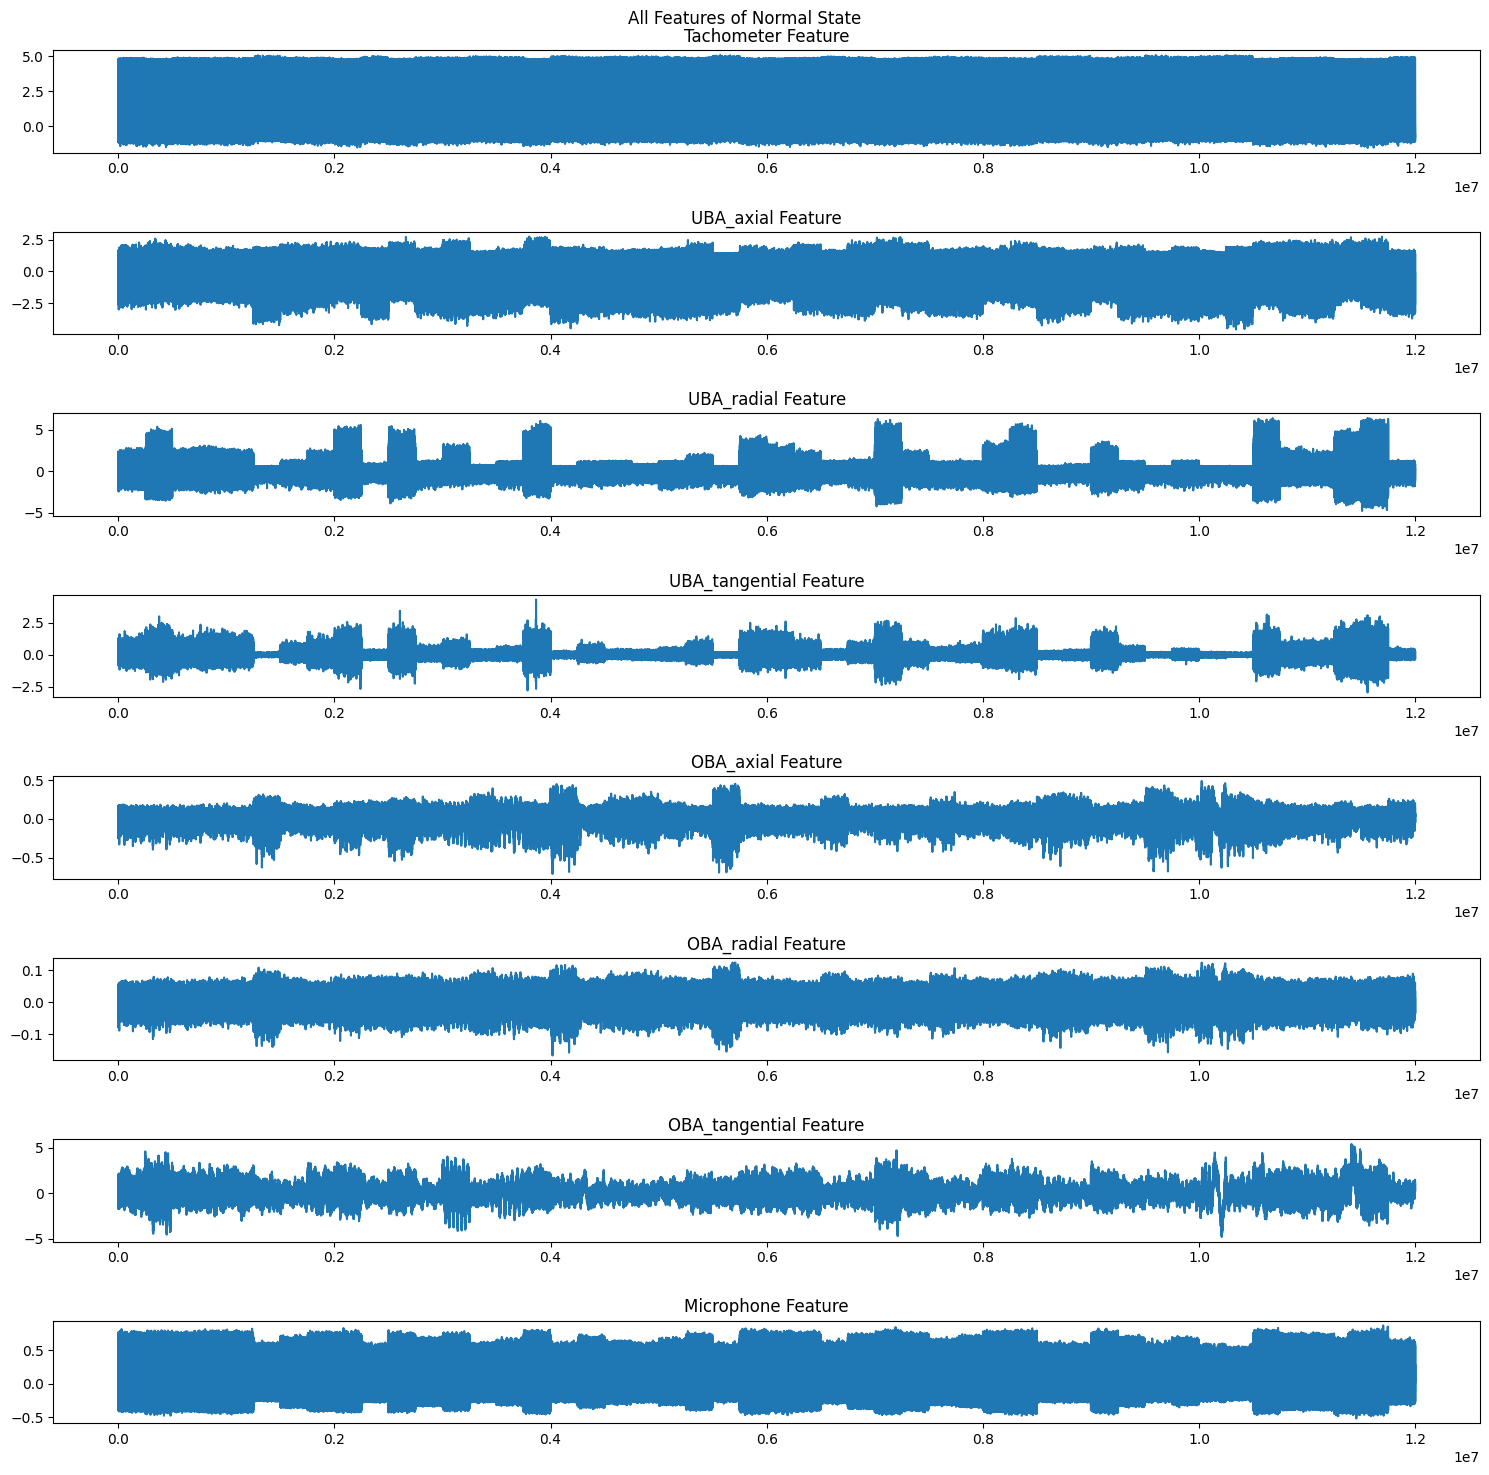

In [13]:
plot_data(data_10g)

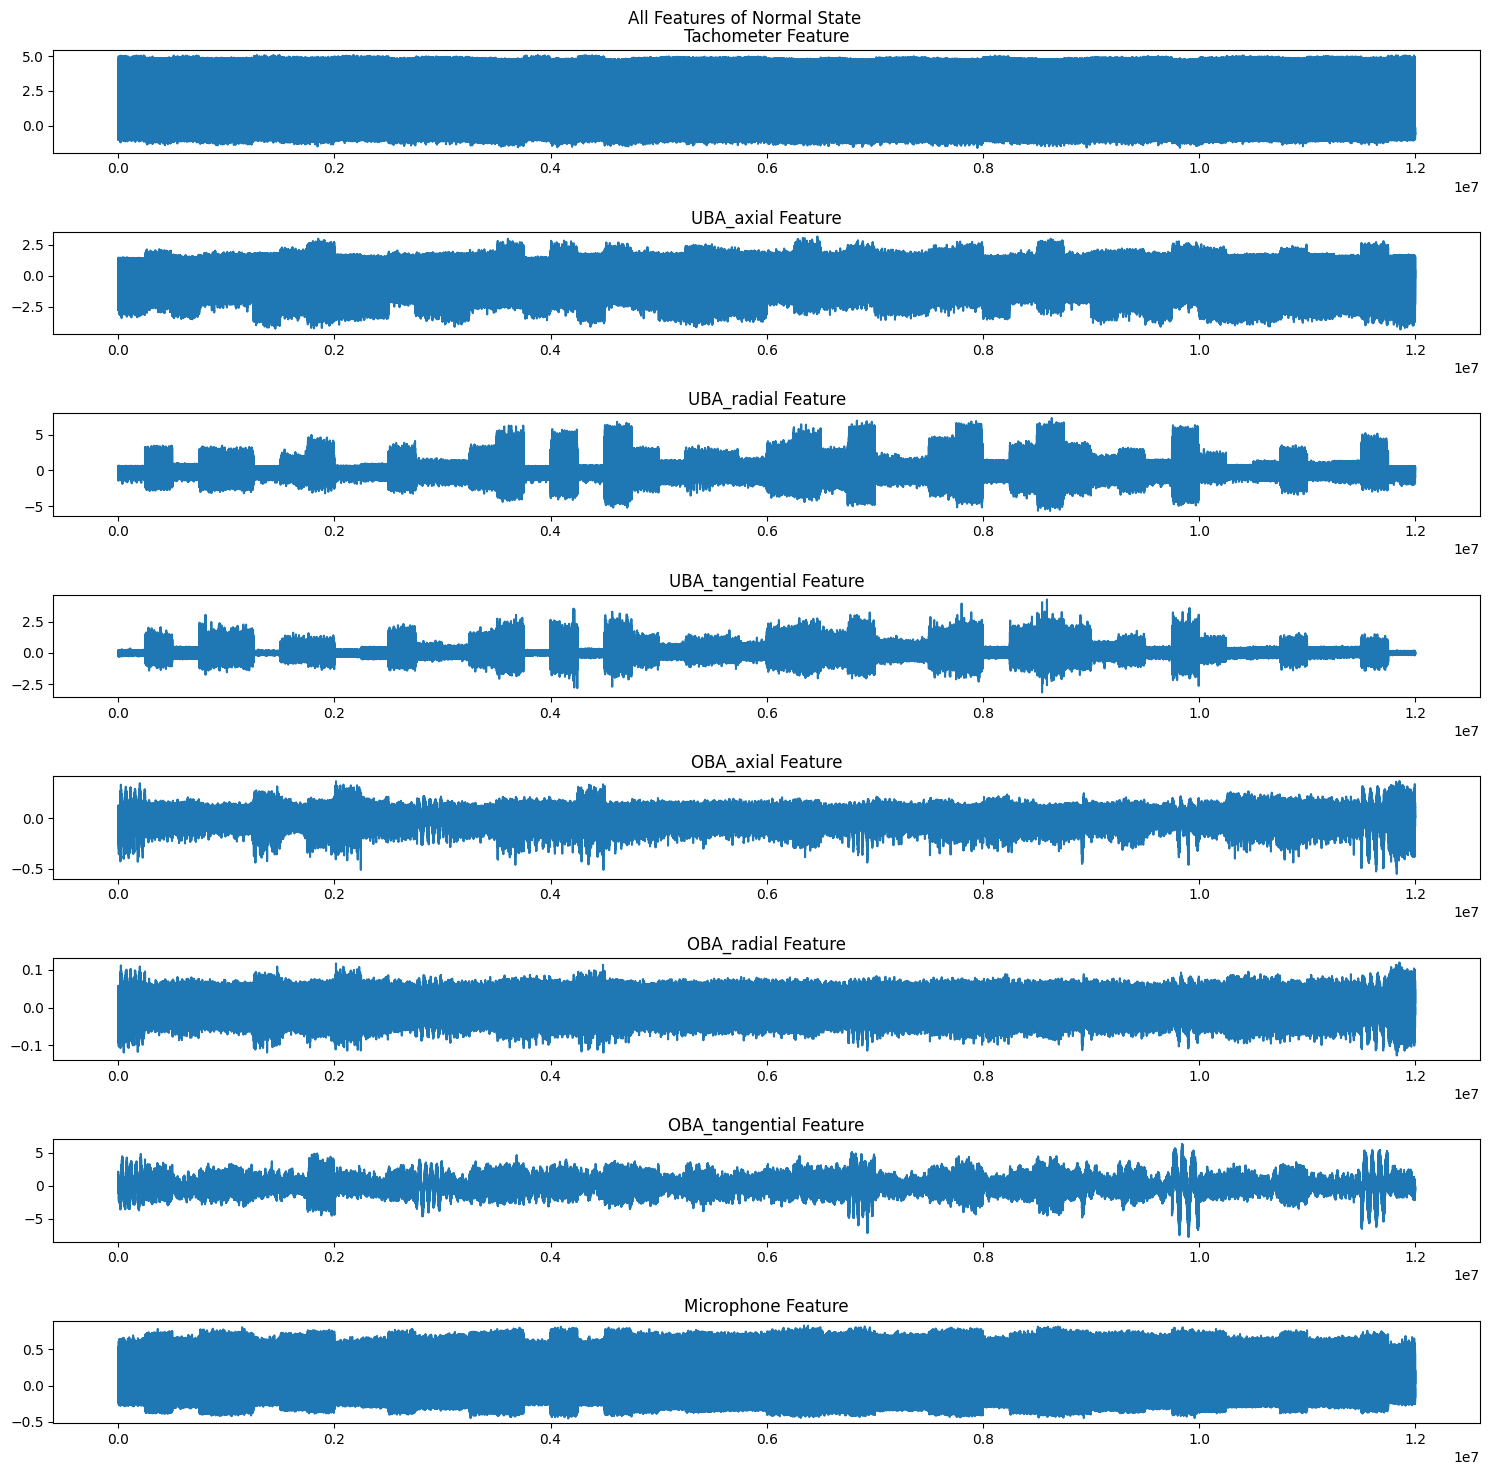

In [14]:
plot_data(data_15g)

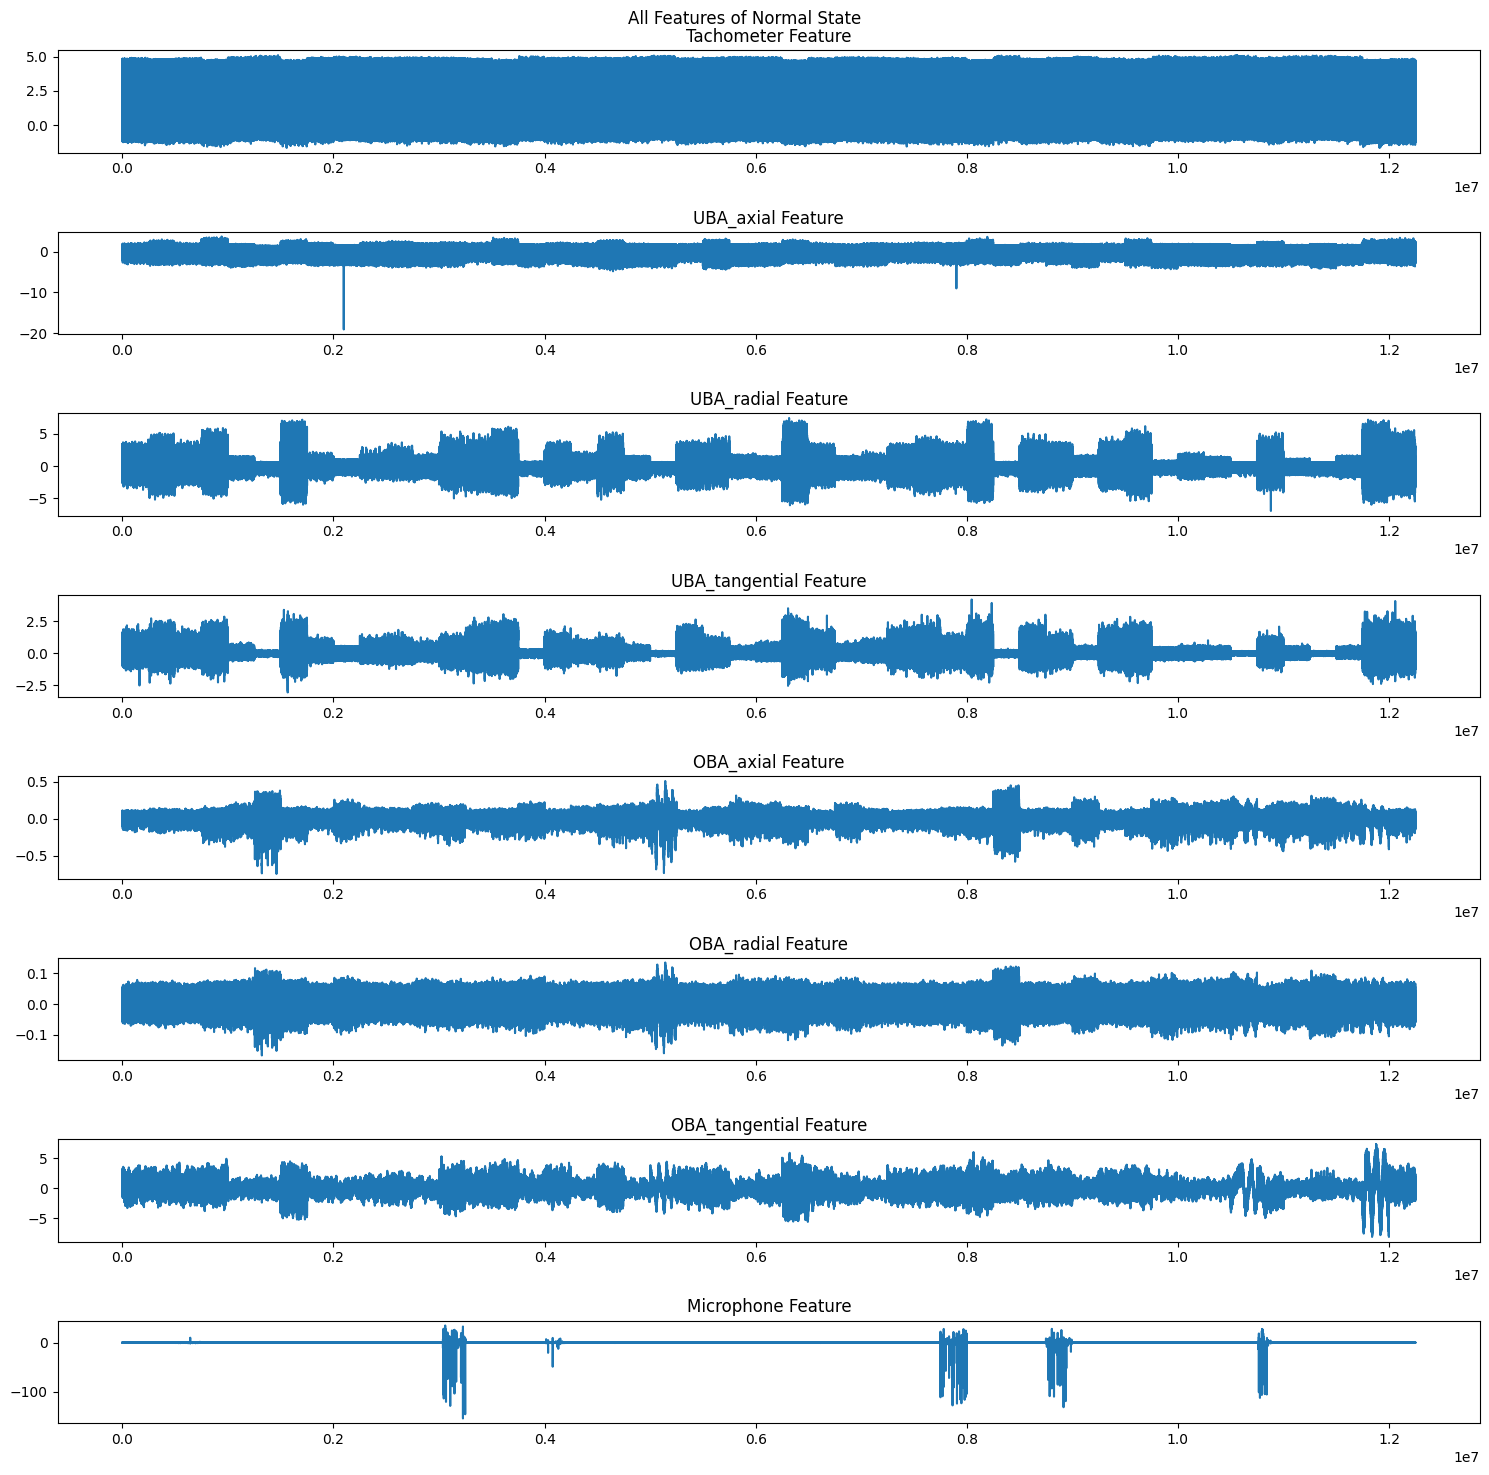

In [15]:
plot_data(data_20g)

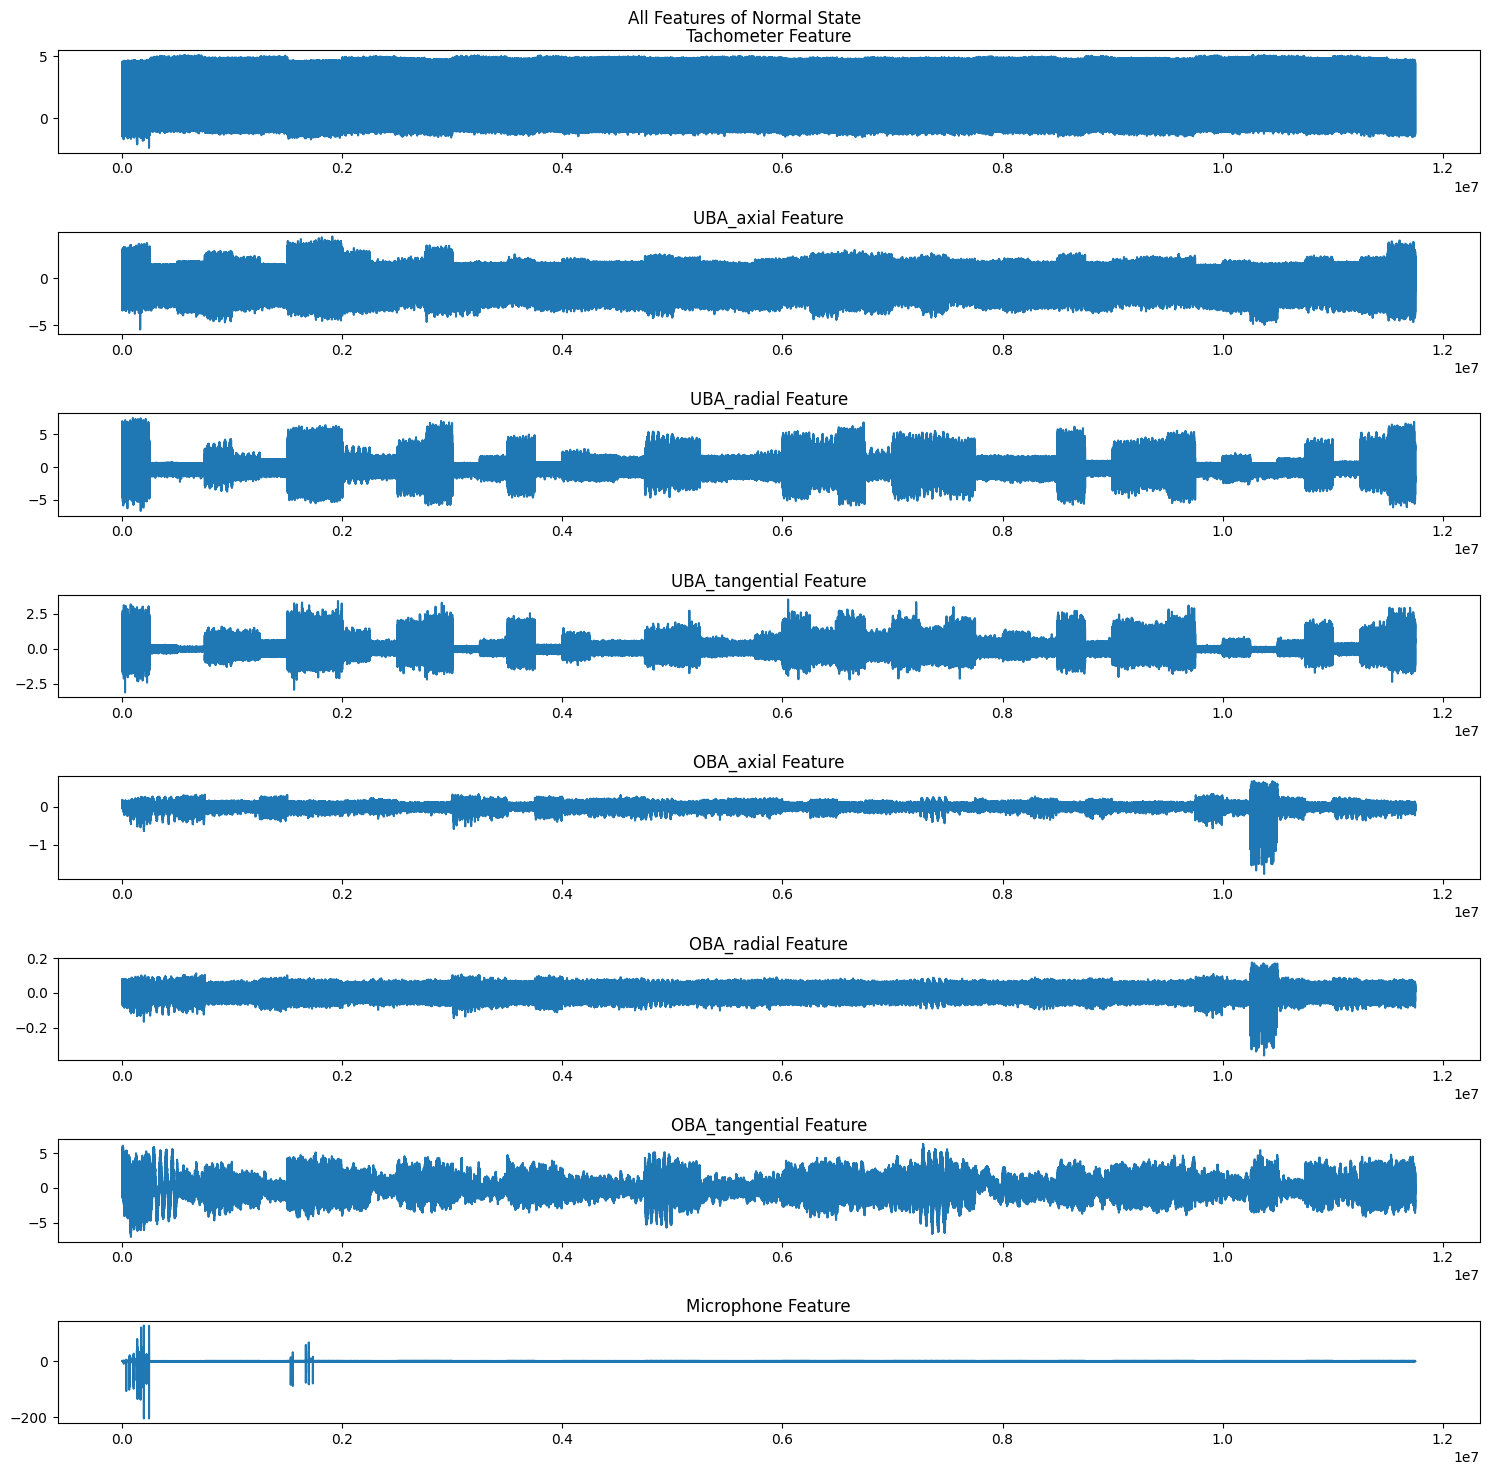

In [16]:
plot_data(data_25g)

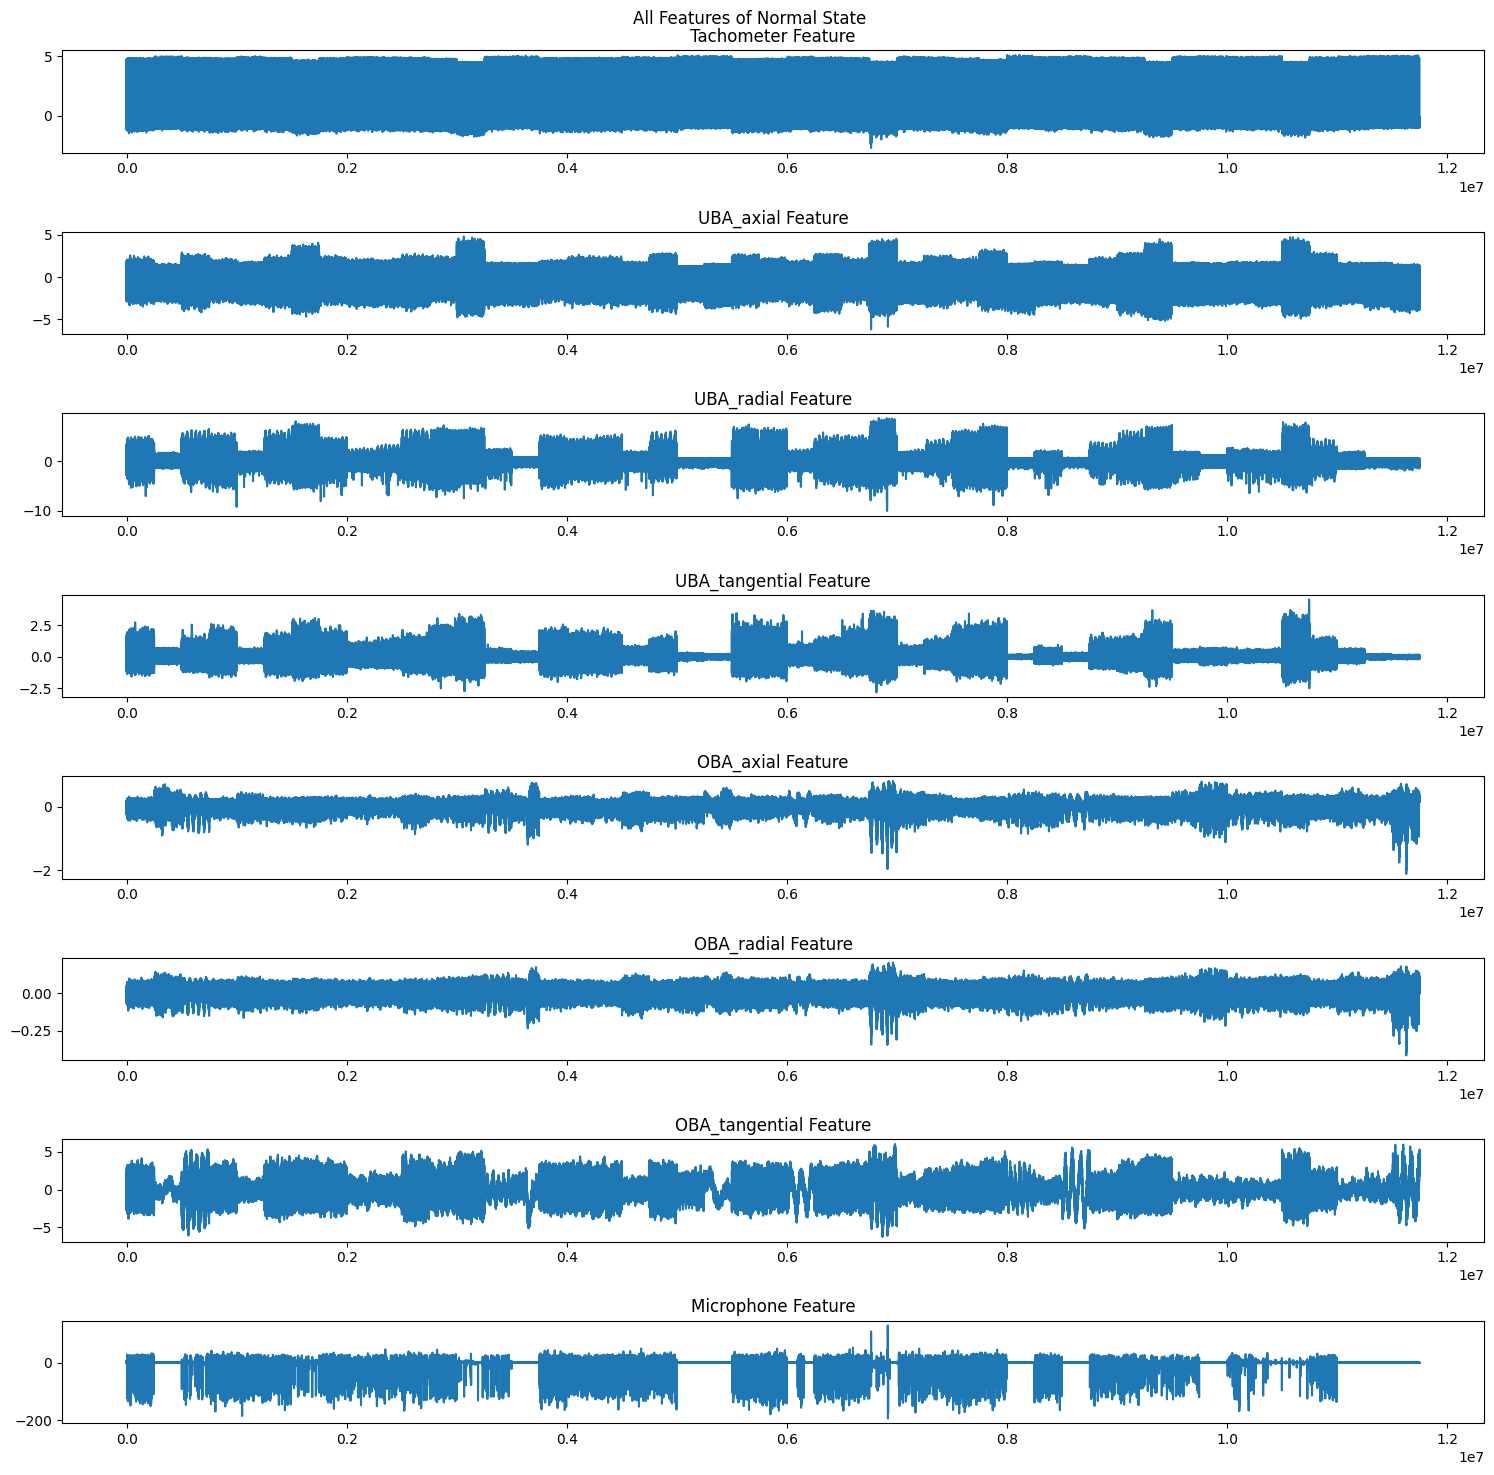

In [17]:
plot_data(data_30g)

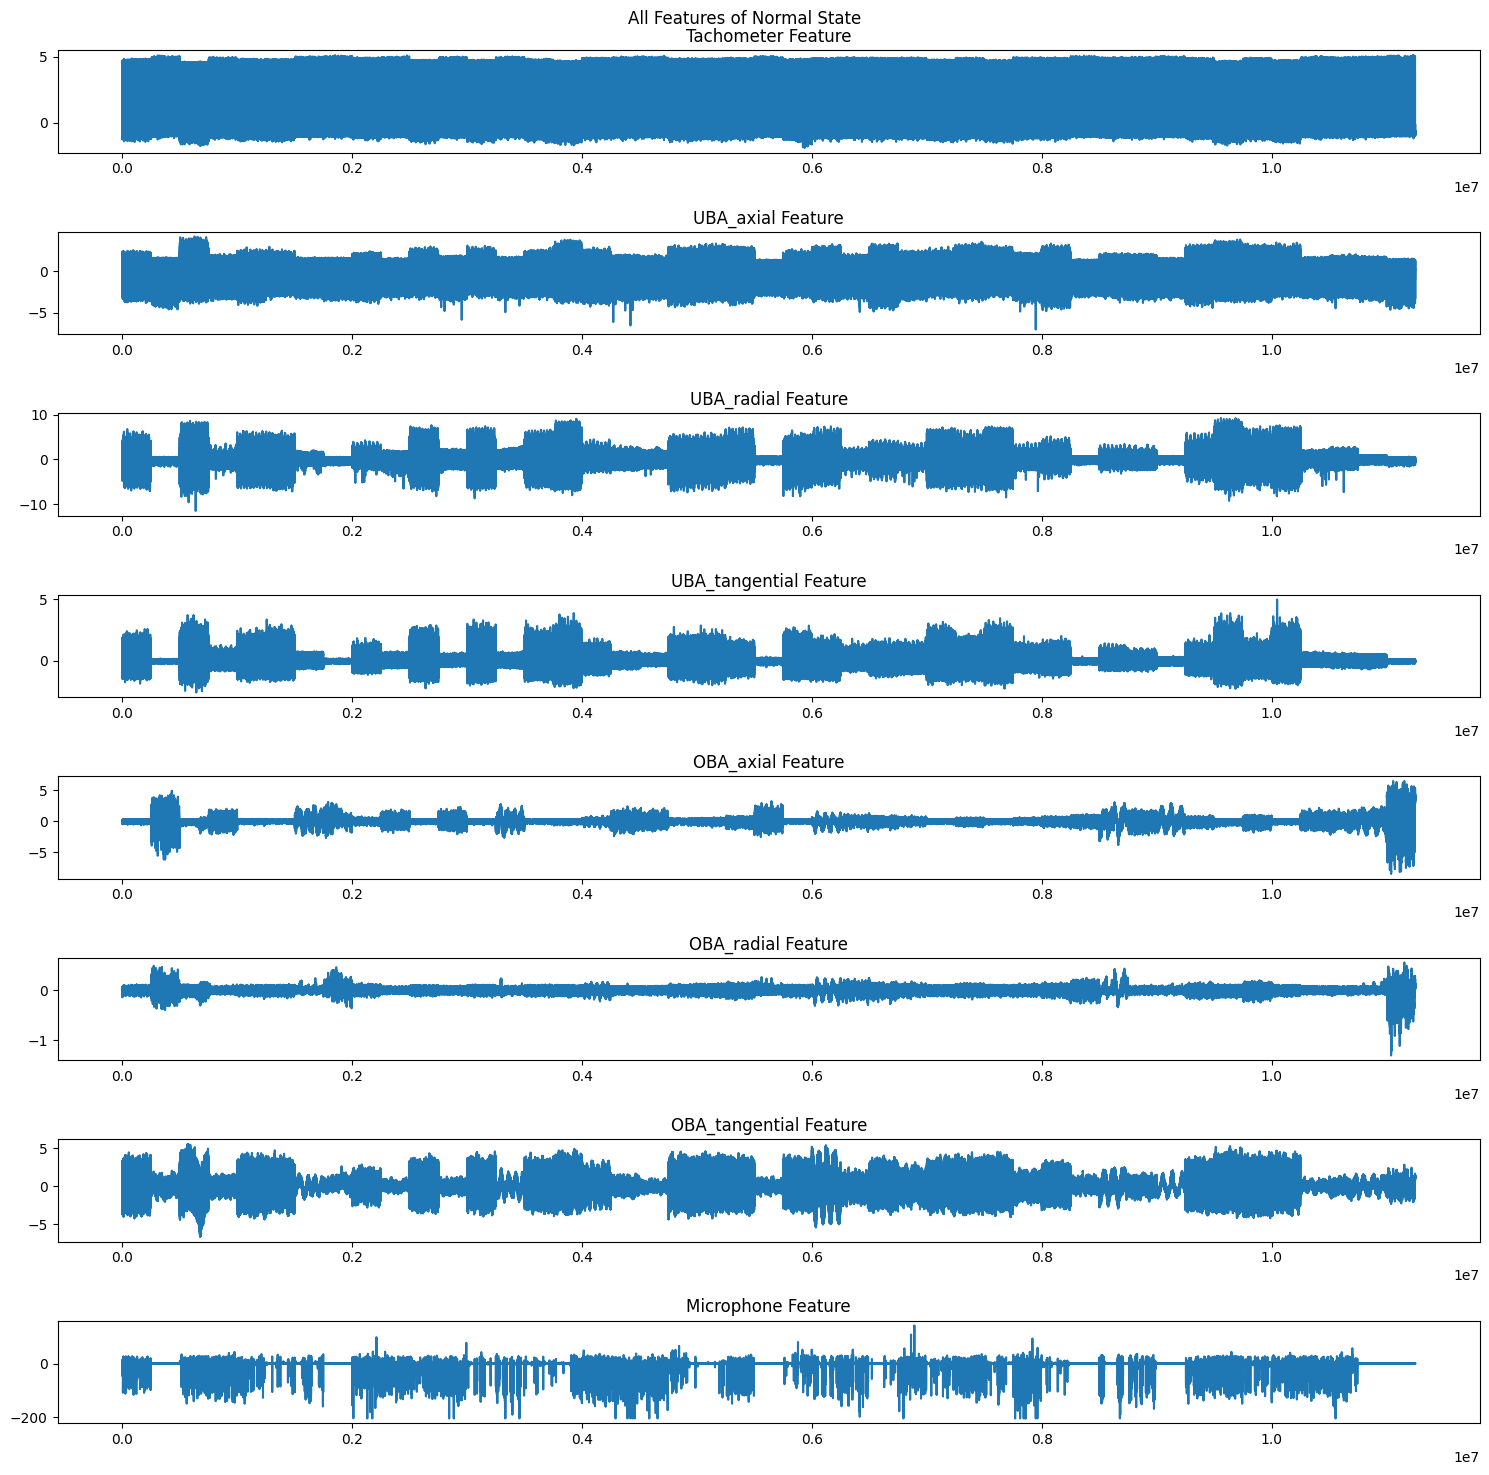

In [18]:
plot_data(data_35g)

In [19]:
data_normal['Fault'] = 0
data_6g['Fault'] = 1
data_10g['Fault'] = 1
data_15g['Fault'] = 1
data_20g['Fault'] = 1
data_25g['Fault'] = 1
data_30g['Fault'] = 1
data_35g['Fault'] = 1

In [20]:
data_normal.head(10)

,Tachometer,UBA_axial,UBA_radial,UBA_tangential,OBA_axial,OBA_radial,OBA_tangential,Microphone,Fault
0,-0.79198,-0.323980,-0.453810,0.233640,-0.40261,-0.020101,-0.104640,-0.099248,0
1,-0.95877,0.703680,-0.289890,0.258740,-0.36562,-0.018753,-0.004520,0.038236,0
2,-0.80153,-0.078640,-0.463250,-0.012234,-0.46396,-0.022398,-0.043919,0.125900,0
3,-0.82726,0.673670,0.101460,-0.136560,-0.38256,-0.021468,0.049500,-0.160140,0
4,-0.95506,-0.106500,-0.485760,-0.470790,-0.49939,-0.024554,-0.024306,0.315180,0
5,-0.78648,0.308980,0.130440,-0.422160,-0.42019,-0.021647,0.139270,-0.273800,0
6,-0.88846,0.085564,-0.418340,-0.553700,-0.47812,-0.021724,0.145130,0.415570,0
7,-0.85492,-0.679910,-0.022051,-0.237810,-0.46686,-0.022501,0.188690,-0.185940,0
8,-0.83932,0.573730,-0.262820,0.034744,-0.45229,-0.021731,0.280310,0.179230,0
9,-0.93213,-0.082191,-0.308490,0.218390,-0.53129,-0.024586,0.315660,-0.015015,0


In [21]:
data_normal.describe()

,Tachometer,UBA_axial,UBA_radial,UBA_tangential,OBA_axial,OBA_radial,OBA_tangential,Microphone,Fault
count,1.225000e+07,1.225000e+07,1.225000e+07,1.225000e+07,1.225000e+07,1.225000e+07,1.225000e+07,1.225000e+07,12250000.0
mean,1.565263e-04,7.892067e-03,-4.660431e-04,3.732063e-04,1.483657e-02,3.021278e-03,1.877392e-02,1.227750e-02,0.0
std,1.711226e+00,8.536628e-01,4.174455e-01,1.837692e-01,6.248925e-01,3.479750e-02,4.133592e-01,1.755920e-01,0.0
min,-1.558800e+00,-4.483500e+00,-3.417000e+00,-2.171700e+00,-2.956600e+00,-3.733500e-01,-2.865800e+00,-3.369100e+00,0.0
25%,-7.135100e-01,-5.590000e-01,-2.866900e-01,-8.650100e-02,-3.302000e-01,-2.157700e-02,-2.295400e-01,-1.245400e-01,0.0
50%,-6.491500e-01,7.351000e-02,1.331900e-02,8.434800e-04,2.170600e-02,4.061300e-03,1.297300e-02,-6.496600e-03,0.0
75%,-5.384100e-01,6.521300e-01,2.979900e-01,8.529200e-02,3.465300e-01,2.810800e-02,2.617800e-01,1.332000e-01,0.0
max,5.107800e+00,2.367200e+00,4.099800e+00,1.933000e+00,3.508700e+00,2.812800e-01,2.836000e+00,8.529000e-01,0.0


In [22]:
data_6g.head(10)

,Tachometer,UBA_axial,UBA_radial,UBA_tangential,OBA_axial,OBA_radial,OBA_tangential,Microphone,Fault
0,-0.48588,0.62345,0.657530,0.024024,0.021815,0.010171,-0.49355,-0.014601,1
1,-0.40711,0.13537,0.075446,0.019104,0.012361,0.003458,-0.70034,-0.026162,1
2,-0.54656,0.54636,0.775660,-0.000717,0.016799,0.008624,-0.64957,-0.090535,1
3,-0.40931,0.36341,-0.162720,-0.062782,0.015939,0.006333,-0.76326,0.052790,1
4,-0.60112,0.35017,0.574430,-0.062184,0.015226,0.006474,-0.66994,-0.173580,1
5,-0.43731,0.54589,-0.176540,0.026875,0.016562,0.006339,-0.64221,0.074670,1
6,-0.48462,0.16198,0.207790,0.140720,0.017268,0.007033,-0.68453,-0.171680,1
7,-0.57388,0.84814,0.056393,0.181930,0.019689,0.010177,-0.66493,0.038869,1
8,-0.51663,0.18246,-0.087062,0.106210,0.016632,0.007129,-0.70639,-0.083575,1
9,-0.46842,0.60722,0.459910,0.048373,0.014963,0.008541,-0.64553,-0.043149,1


In [23]:
data_6g.describe()

,Tachometer,UBA_axial,UBA_radial,UBA_tangential,OBA_axial,OBA_radial,OBA_tangential,Microphone,Fault
count,1.225000e+07,1.225000e+07,1.225000e+07,1.225000e+07,1.225000e+07,1.225000e+07,1.225000e+07,1.225000e+07,12250000.0
mean,-1.712867e-06,3.055806e-03,2.694678e-04,9.066296e-04,7.706909e-03,3.113166e-03,4.595731e-02,1.402789e-02,1.0
std,1.723980e+00,8.341692e-01,5.183670e-01,2.193339e-01,1.063280e-01,3.006839e-02,7.105123e-01,1.809850e-01,0.0
min,-1.548600e+00,-4.508500e+00,-3.710500e+00,-2.390600e+00,-7.665000e-01,-1.563800e-01,-5.026500e+00,-4.824000e-01,1.0
25%,-7.294600e-01,-5.393200e-01,-3.292700e-01,-1.056400e-01,-5.231200e-02,-1.847100e-02,-3.835600e-01,-1.289900e-01,1.0
50%,-6.578300e-01,6.408900e-02,4.550700e-03,-3.003800e-03,1.464100e-02,3.695500e-03,4.084400e-02,-5.352700e-03,1.0
75%,-5.484000e-01,6.245200e-01,3.209000e-01,9.373800e-02,7.487700e-02,2.539900e-02,4.687900e-01,1.399700e-01,1.0
max,5.113000e+00,2.409900e+00,5.384100e+00,2.713400e+00,5.508300e-01,1.392800e-01,4.442600e+00,8.686900e-01,1.0


In [24]:
data_10g.head(10)

,Tachometer,UBA_axial,UBA_radial,UBA_tangential,OBA_axial,OBA_radial,OBA_tangential,Microphone,Fault
0,-0.62563,1.093800,-0.215720,-0.16995,0.044043,-0.003576,-0.77875,0.048945,1
1,-0.42668,0.243100,-0.529770,-0.20420,0.038770,-0.007015,-0.84500,0.007790,1
2,-0.63200,1.080000,0.066922,-0.19026,0.034069,-0.009666,-0.83452,-0.087736,1
3,-0.24426,0.315950,-0.605290,-0.34619,0.030929,-0.012201,-1.01680,0.142670,1
4,-0.61566,0.628820,0.098007,-0.27476,0.027994,-0.013009,-0.95845,-0.179470,1
5,-0.51986,0.543940,-0.792940,-0.26290,0.021128,-0.016911,-1.01440,0.159630,1
6,-0.44994,0.318180,-0.128670,-0.21557,0.027595,-0.012188,-0.92003,-0.197520,1
7,-0.59156,0.901610,-0.575890,-0.25977,0.031481,-0.010173,-0.82483,0.150310,1
8,-0.36367,0.095139,-0.376930,-0.36318,0.033632,-0.009268,-0.80287,-0.101680,1
9,-0.48160,0.786820,-0.289610,-0.40381,0.033202,-0.008138,-0.77404,0.025386,1


In [25]:
data_10g.describe()

,Tachometer,UBA_axial,UBA_radial,UBA_tangential,OBA_axial,OBA_radial,OBA_tangential,Microphone,Fault
count,1.200000e+07,1.200000e+07,1.200000e+07,1.200000e+07,1.200000e+07,1.200000e+07,1.200000e+07,1.200000e+07,12000000.0
mean,7.338304e-04,2.249320e-03,-2.705024e-04,3.467181e-04,7.958927e-03,3.079407e-03,8.550592e-02,1.294135e-02,1.0
std,1.731221e+00,8.656899e-01,6.980803e-01,2.741527e-01,1.002756e-01,3.007430e-02,8.830473e-01,1.781657e-01,0.0
min,-1.565500e+00,-4.589800e+00,-4.789400e+00,-2.940700e+00,-7.117200e-01,-1.661000e-01,-4.818900e+00,-5.151600e-01,1.0
25%,-7.384600e-01,-5.824600e-01,-4.174200e-01,-1.450400e-01,-4.765600e-02,-1.850900e-02,-4.659900e-01,-1.274800e-01,1.0
50%,-6.605900e-01,5.893200e-02,-1.822000e-03,-9.118400e-03,1.524500e-02,3.753200e-03,7.073100e-02,-5.936900e-03,1.0
75%,-5.498500e-01,6.650800e-01,3.928200e-01,1.217400e-01,7.085700e-02,2.532900e-02,6.237400e-01,1.367800e-01,1.0
max,5.102300e+00,2.765800e+00,6.416300e+00,4.293900e+00,4.887900e-01,1.248800e-01,5.391000e+00,8.714200e-01,1.0


In [26]:
data_15g.head(10)

,Tachometer,UBA_axial,UBA_radial,UBA_tangential,OBA_axial,OBA_radial,OBA_tangential,Microphone,Fault
0,-0.66438,-0.40829,-0.260420,-0.098159,-0.047951,-0.027770,0.65203,0.245810,1
1,-0.82416,0.13924,0.273500,-0.046223,-0.052807,-0.029919,0.69393,-0.128160,1
2,-0.75293,0.49908,-0.117000,-0.105850,-0.053744,-0.031806,0.72978,0.163480,1
3,-0.71954,-0.63954,-0.083304,-0.098846,-0.051567,-0.023630,0.70207,0.003847,1
4,-0.71257,1.11090,0.163600,-0.010454,-0.048606,-0.024875,0.83990,0.000342,1
5,-0.80386,-1.24900,-0.410170,-0.019247,-0.055684,-0.025786,0.77195,0.126120,1
6,-0.76495,1.10460,0.356380,0.107240,-0.050456,-0.023656,0.91384,-0.125360,1
7,-0.71237,-0.92448,-0.511430,-0.007500,-0.052935,-0.022116,0.85566,0.214170,1
8,-0.70426,0.67095,0.329540,0.065246,-0.048144,-0.016719,0.94908,-0.159850,1
9,-0.84591,-0.24681,-0.281590,-0.011700,-0.047874,-0.016366,0.92450,0.182440,1


In [27]:
data_15g.describe()

,Tachometer,UBA_axial,UBA_radial,UBA_tangential,OBA_axial,OBA_radial,OBA_tangential,Microphone,Fault
count,1.200000e+07,1.200000e+07,1.200000e+07,1.200000e+07,1.200000e+07,1.200000e+07,1.200000e+07,1.200000e+07,12000000.0
mean,8.075495e-05,1.312402e-02,4.713938e-05,5.068030e-04,9.723399e-03,2.968638e-03,3.198984e-02,1.369308e-02,1.0
std,1.738244e+00,8.578400e-01,8.851083e-01,3.321834e-01,8.099584e-02,2.868619e-02,1.186607e+00,1.736870e-01,0.0
min,-1.606300e+00,-4.306500e+00,-5.683700e+00,-3.173500e+00,-5.531400e-01,-1.273400e-01,-7.781000e+00,-4.537800e-01,1.0
25%,-7.484900e-01,-5.719400e-01,-5.216700e-01,-1.931100e-01,-3.681500e-02,-1.811100e-02,-6.755100e-01,-1.247300e-01,1.0
50%,-6.643500e-01,6.495000e-02,-3.996500e-03,-1.475100e-02,1.579700e-02,3.580000e-03,3.269400e-02,-6.131600e-03,1.0
75%,-5.512100e-01,6.697200e-01,4.802100e-01,1.588700e-01,6.255900e-02,2.463600e-02,7.503200e-01,1.343000e-01,1.0
max,5.084900e+00,3.152700e+00,7.373700e+00,4.266900e+00,3.720500e-01,1.199400e-01,6.349400e+00,8.292900e-01,1.0


In [28]:
data_20g.head(10)

,Tachometer,UBA_axial,UBA_radial,UBA_tangential,OBA_axial,OBA_radial,OBA_tangential,Microphone,Fault
0,-0.70767,-0.633920,-1.72150,-0.27016,0.070163,0.005762,-1.10510,0.072821,1
1,-0.61342,0.243390,-1.03460,-0.26390,0.071499,0.011409,-1.00990,-0.130670,1
2,-0.71770,-0.629860,-1.82670,-0.35370,0.076579,0.013399,-1.18980,0.300310,1
3,-0.68657,-0.116120,-0.87464,-0.21653,0.077202,0.017358,-1.05300,-0.309260,1
4,-0.73878,-0.382630,-1.74170,-0.23501,0.077189,0.016543,-1.11720,0.389460,1
5,-0.62342,-0.421750,-1.04280,-0.13054,0.078345,0.018032,-1.04720,-0.302320,1
6,-0.68183,0.037541,-1.51580,-0.16782,0.076528,0.017313,-1.06370,0.317560,1
7,-0.72241,-0.882220,-1.43540,-0.13130,0.076200,0.015908,-1.08900,-0.078220,1
8,-0.70823,0.221730,-1.01210,-0.13064,0.077311,0.019110,-0.82989,0.027357,1
9,-0.71838,-0.687750,-1.49920,-0.22657,0.079103,0.016684,-0.93838,0.159880,1


In [29]:
data_20g.describe()

,Tachometer,UBA_axial,UBA_radial,UBA_tangential,OBA_axial,OBA_radial,OBA_tangential,Microphone,Fault
count,1.225000e+07,1.225000e+07,1.225000e+07,1.225000e+07,1.225000e+07,1.225000e+07,1.225000e+07,1.225000e+07,12250000.0
mean,3.964252e-04,1.410972e-02,-2.091549e-04,3.780037e-04,5.510594e-03,2.652352e-03,1.623787e-02,1.247051e-02,1.0
std,1.749656e+00,9.240949e-01,1.043973e+00,3.652606e-01,8.320578e-02,2.932605e-02,1.265345e+00,2.984980e-01,0.0
min,-1.657200e+00,-1.906400e+01,-6.952700e+00,-3.064700e+00,-7.498600e-01,-1.673600e-01,-8.118100e+00,-1.549300e+02,1.0
25%,-7.580100e-01,-6.256900e-01,-6.179000e-01,-2.249100e-01,-3.739900e-02,-1.863100e-02,-7.519600e-01,-1.235100e-01,1.0
50%,-6.700300e-01,6.733900e-02,-4.642100e-03,-1.723100e-02,1.130800e-02,3.284800e-03,9.280200e-03,-6.034200e-03,1.0
75%,-5.530100e-01,7.229900e-01,5.847225e-01,1.844500e-01,5.500600e-02,2.453300e-02,7.826500e-01,1.322300e-01,1.0
max,5.114900e+00,3.714000e+00,7.478900e+00,4.223000e+00,5.135100e-01,1.355400e-01,7.393300e+00,3.526200e+01,1.0


In [30]:
data_25g.head(10)

,Tachometer,UBA_axial,UBA_radial,UBA_tangential,OBA_axial,OBA_radial,OBA_tangential,Microphone,Fault
0,4.1131,0.32586,-3.0529,-0.62448,0.17265,0.053213,-1.3525,0.316470,1
1,4.1104,1.17130,-2.5088,-0.42177,0.17355,0.052821,-1.2942,-0.222500,1
2,4.1110,0.84071,-2.7766,-0.36218,0.16849,0.049844,-1.2562,0.212500,1
3,4.1116,1.08890,-2.5401,-0.29929,0.16778,0.047058,-1.2686,-0.097228,1
4,4.1075,1.00290,-2.5472,-0.26269,0.16278,0.045018,-1.2407,0.026360,1
5,4.1157,0.98265,-2.8528,-0.33272,0.16230,0.039839,-1.3295,0.095382,1
6,4.1032,1.05620,-2.4710,-0.40771,0.15893,0.040262,-1.2871,-0.162580,1
7,4.1208,0.60542,-2.9882,-0.64331,0.15892,0.037304,-1.3693,0.266840,1
8,4.0950,1.21530,-2.1924,-0.62910,0.15390,0.034217,-1.2048,-0.247030,1
9,4.1270,0.92426,-2.7673,-0.66227,0.15429,0.034480,-1.1298,0.261560,1


In [31]:
data_25g.describe()

,Tachometer,UBA_axial,UBA_radial,UBA_tangential,OBA_axial,OBA_radial,OBA_tangential,Microphone,Fault
count,1.175000e+07,1.175000e+07,1.175000e+07,1.175000e+07,1.175000e+07,1.175000e+07,1.175000e+07,1.175000e+07,11750000.0
mean,-2.323131e-04,1.247999e-02,-1.094377e-04,3.019547e-04,6.621513e-03,2.890051e-03,3.833553e-02,1.314005e-02,1.0
std,1.747504e+00,9.718565e-01,1.128358e+00,3.938926e-01,1.017264e-01,3.177774e-02,1.373735e+00,2.553177e-01,0.0
min,-2.401600e+00,-5.436200e+00,-6.724900e+00,-3.122700e+00,-1.759200e+00,-3.589400e-01,-7.073600e+00,-2.041200e+02,1.0
25%,-7.548600e-01,-6.529600e-01,-6.554700e-01,-2.424300e-01,-3.556900e-02,-1.852800e-02,-8.168400e-01,-1.201100e-01,1.0
50%,-6.653000e-01,7.986200e-02,-1.160300e-03,-1.402600e-02,1.171900e-02,3.644100e-03,2.001100e-02,-5.304100e-03,1.0
75%,-5.481100e-01,7.546100e-01,6.334200e-01,2.057900e-01,5.577700e-02,2.518800e-02,8.672700e-01,1.295300e-01,1.0
max,5.108300e+00,4.407000e+00,7.527900e+00,3.538400e+00,6.670100e-01,1.749300e-01,6.314400e+00,1.268600e+02,1.0


In [32]:
data_30g.head(10)

,Tachometer,UBA_axial,UBA_radial,UBA_tangential,OBA_axial,OBA_radial,OBA_tangential,Microphone,Fault
0,-0.73481,0.170910,2.1457,0.525240,-0.005840,-0.006104,0.98591,-0.188790,1
1,-0.74230,0.040719,1.1245,0.586150,-0.013206,-0.009172,0.91416,0.263120,1
2,-0.73570,-0.195750,1.7922,0.576040,-0.007856,-0.007227,0.91712,-0.210620,1
3,-0.74054,0.210180,1.4731,0.434730,-0.007541,-0.007150,0.81706,0.207940,1
4,-0.73994,-0.550530,1.7824,0.289280,-0.003508,-0.000880,0.70059,-0.109790,1
5,-0.73927,0.398070,2.0492,0.234550,0.009311,0.009202,0.71829,0.063937,1
6,-0.73811,-0.622350,1.6089,0.126830,0.001848,0.006102,0.55048,0.057220,1
7,-0.74070,0.370880,2.2854,0.078901,0.012618,0.009997,0.62485,-0.099589,1
8,-0.73669,-0.472310,1.3725,0.003355,-0.003258,0.004446,0.46425,0.208480,1
9,-0.74264,0.139700,2.2586,0.103130,0.006254,0.007071,0.52993,-0.212100,1


In [33]:
data_30g.describe()

,Tachometer,UBA_axial,UBA_radial,UBA_tangential,OBA_axial,OBA_radial,OBA_tangential,Microphone,Fault
count,1.175000e+07,1.175000e+07,1.175000e+07,1.175000e+07,1.175000e+07,1.175000e+07,1.175000e+07,1.175000e+07,11750000.0
mean,6.475114e-05,1.076924e-02,-6.650708e-04,-2.025143e-04,4.668490e-03,2.093556e-03,-2.502578e-02,-9.462186e-05,1.0
std,1.770582e+00,1.028021e+00,1.309237e+00,4.464685e-01,1.841351e-01,4.154274e-02,1.489526e+00,1.451608e+00,0.0
min,-2.707700e+00,-6.199700e+00,-1.007400e+01,-2.849200e+00,-2.111200e+00,-4.176600e-01,-6.250700e+00,-1.937700e+02,1.0
25%,-7.734000e-01,-6.786700e-01,-7.631000e-01,-2.696500e-01,-9.880400e-02,-2.401500e-02,-1.020200e+00,-1.168000e-01,1.0
50%,-6.709700e-01,7.563600e-02,-1.272400e-02,-1.288900e-02,1.953500e-02,3.496500e-03,-5.718000e-02,-3.211000e-03,1.0
75%,-5.493000e-01,7.681300e-01,7.443400e-01,2.309800e-01,1.251600e-01,3.029000e-02,9.101500e-01,1.334900e-01,1.0
max,5.109300e+00,4.800100e+00,8.737400e+00,4.541900e+00,8.076700e-01,2.077700e-01,6.016500e+00,1.304000e+02,1.0


In [34]:
data_35g.head(10)

,Tachometer,UBA_axial,UBA_radial,UBA_tangential,OBA_axial,OBA_radial,OBA_tangential,Microphone,Fault
0,-0.89074,1.01740,1.03660,-0.170650,-0.063140,-0.001233,0.189500,0.087618,1
1,-0.95093,0.78159,1.60170,-0.367250,-0.062556,0.001327,0.244210,-0.177150,1
2,-0.87904,1.23250,1.25510,-0.449450,-0.066589,0.001340,0.309140,0.062161,1
3,-0.94415,0.58997,1.21620,-0.316620,-0.073313,0.003747,0.339550,-0.121130,1
4,-0.91298,1.00770,1.34470,-0.198880,-0.079581,0.003201,0.360740,-0.015380,1
5,-0.96676,0.58094,0.81066,-0.047881,-0.090294,-0.000514,0.229720,-0.028620,1
6,-0.93113,0.94992,1.53850,0.095466,-0.088470,-0.000912,0.188210,-0.109570,1
7,-0.91753,0.67216,0.76582,0.180180,-0.091701,-0.002485,0.089952,0.065982,1
8,-0.96121,0.71042,1.65330,0.233720,-0.080230,-0.000418,0.022111,-0.174040,1
9,-0.87059,0.88382,1.03380,0.179940,-0.073859,0.000872,-0.083060,0.087107,1


In [35]:
data_35g.describe()

,Tachometer,UBA_axial,UBA_radial,UBA_tangential,OBA_axial,OBA_radial,OBA_tangential,Microphone,Fault
count,1.125000e+07,1.125000e+07,1.125000e+07,1.125000e+07,1.125000e+07,1.125000e+07,1.125000e+07,1.125000e+07,11250000.0
mean,2.796292e-04,9.925542e-03,-4.218091e-04,-1.769692e-05,1.556384e-02,3.333025e-03,-4.976146e-03,-1.276990e-03,1.0
std,1.763485e+00,1.029493e+00,1.462225e+00,5.004053e-01,8.029624e-01,6.469904e-02,1.456787e+00,1.275582e+00,0.0
min,-1.894500e+00,-7.005300e+00,-1.149400e+01,-2.546500e+00,-8.488600e+00,-1.300500e+00,-6.635100e+00,-2.041200e+02,1.0
25%,-7.829500e-01,-7.324100e-01,-8.407600e-01,-3.002400e-01,-2.149800e-01,-2.862900e-02,-8.734900e-01,-1.166300e-01,1.0
50%,-6.717900e-01,7.736300e-02,-7.995500e-03,-1.298500e-02,2.502000e-02,3.868700e-03,-7.821300e-03,-7.397100e-03,1.0
75%,-5.508000e-01,7.987700e-01,8.284400e-01,2.692600e-01,2.332800e-01,3.546200e-02,8.436500e-01,1.242700e-01,1.0
max,5.114900e+00,4.176400e+00,9.242800e+00,4.969400e+00,6.456800e+00,5.525100e-01,5.547000e+00,1.420400e+02,1.0


In [36]:
df = pd.concat([data_normal,data_6g,data_10g,data_15g,data_20g,data_25g,data_30g,data_35g],axis=0)

In [37]:
df.sample(20)

,Tachometer,UBA_axial,UBA_radial,UBA_tangential,OBA_axial,OBA_radial,OBA_tangential,Microphone,Fault
7424453,-0.95354,0.726310,0.120710,0.681870,-0.075304,-0.028944,-0.180130,0.199180,1
3318670,-0.71197,0.001545,-0.316780,-0.283610,0.736400,0.030694,-0.348170,0.434190,0
11787852,-0.56144,0.905080,0.503010,0.018667,-0.153820,-0.024586,-0.160100,-0.134930,1
10682484,-0.74402,-0.952040,1.193400,0.055618,0.125750,0.051884,0.051388,0.336380,1
2911583,-0.78491,0.216960,1.066400,1.373400,-0.045023,0.051365,1.093000,0.227200,1
2724244,-0.71211,0.496020,0.995150,1.270500,-0.042852,0.000942,2.719500,-0.012459,1
33447,-0.70343,-0.069450,1.250600,-0.659880,0.000564,-0.028289,-0.629070,-0.144220,1
7704901,-0.72494,-1.811700,-0.548850,0.136970,0.013267,-0.006207,1.586000,0.463470,1
3474571,-0.60722,0.708950,-0.155930,-0.267960,0.096636,0.023750,0.330890,-0.105920,1
5268125,-0.68735,-0.765160,-0.382510,0.271540,0.050196,0.026189,1.719100,0.137070,1


In [63]:
# Separate the classes
df_fault_1 = df[df['Fault'] == 1]
df_fault_0 = df[df['Fault'] == 0]

# Sample 200 batches of 50 rows each
fault_1_samples = [df_fault_1.sample(n=50, random_state=i) for i in range(200)]
fault_0_samples = [df_fault_0.sample(n=50, random_state=i) for i in range(200)]

# Combine the batches into a downsampled dataset
downsampled_df = pd.concat(fault_1_samples + fault_0_samples, axis=0)

# Shuffle the dataset to mix the rows
downsampled_df = downsampled_df.sample(frac=1, random_state=42).reset_index(drop=True)

In [64]:
x = downsampled_df.drop(['Fault'],axis=1)
y = downsampled_df['Fault']
y.value_counts()

Fault
0    10000
1    10000
Name: count, dtype: int64

In [65]:
x_train_downsampled,x_test,y_train_downsampled,y_test = train_test_split(x, y, test_size=0.3, random_state=42, stratify=y)

In [66]:
y_test.value_counts()

Fault
0    3000
1    3000
Name: count, dtype: int64

In [67]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train_downsampled)
x_test_scaled = scaler.transform(x_test)

Model: Logistic Regression
Accuracy: 0.49
Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.51      0.50      3000
           1       0.49      0.48      0.49      3000

    accuracy                           0.49      6000
   macro avg       0.49      0.49      0.49      6000
weighted avg       0.49      0.49      0.49      6000



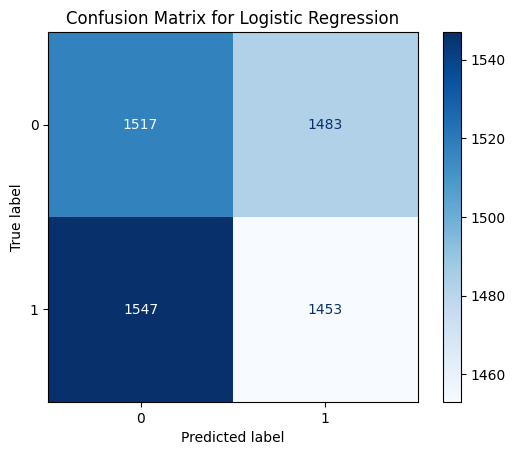

Model: Random Forest
Accuracy: 0.87
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.85      0.87      3000
           1       0.85      0.89      0.87      3000

    accuracy                           0.87      6000
   macro avg       0.87      0.87      0.87      6000
weighted avg       0.87      0.87      0.87      6000



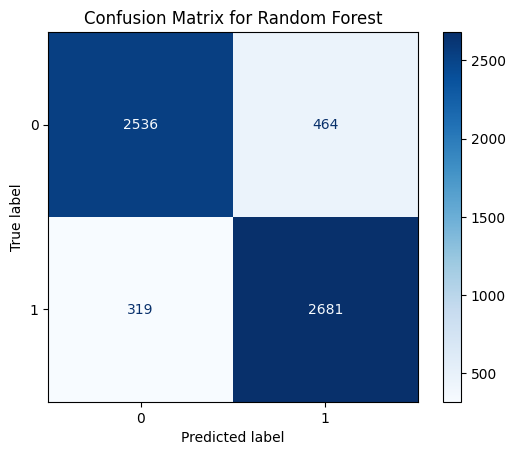

Model: Support Vector Classifier
Accuracy: 0.84
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.88      0.85      3000
           1       0.87      0.80      0.83      3000

    accuracy                           0.84      6000
   macro avg       0.84      0.84      0.84      6000
weighted avg       0.84      0.84      0.84      6000



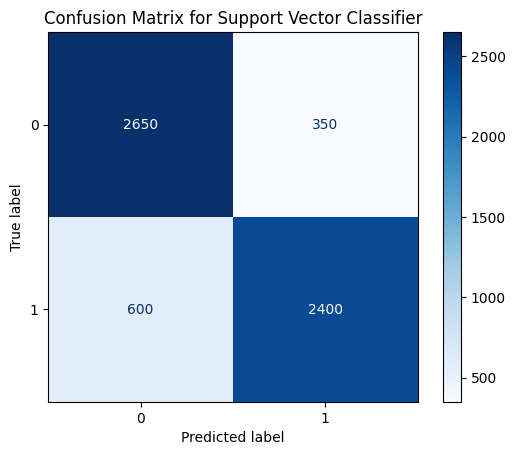

Model: Decision Tree
Accuracy: 0.81
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.81      0.81      3000
           1       0.81      0.81      0.81      3000

    accuracy                           0.81      6000
   macro avg       0.81      0.81      0.81      6000
weighted avg       0.81      0.81      0.81      6000



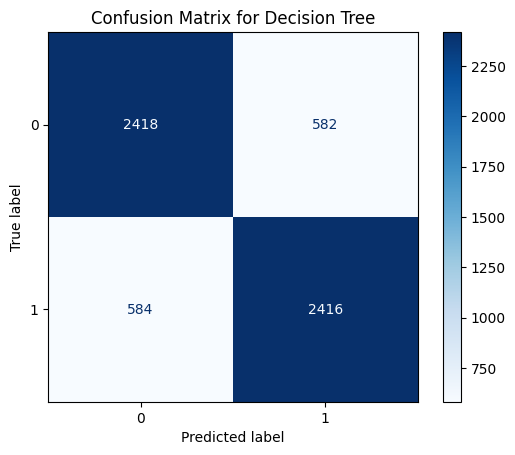

Model: K-Nearest Neighbors
Accuracy: 0.82
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.80      0.82      3000
           1       0.81      0.84      0.82      3000

    accuracy                           0.82      6000
   macro avg       0.82      0.82      0.82      6000
weighted avg       0.82      0.82      0.82      6000



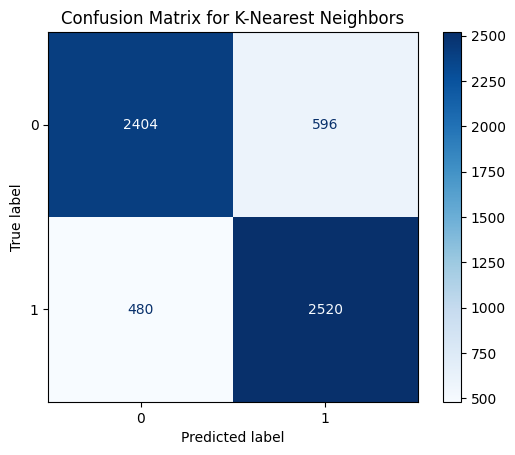

Model: Naive Bayes
Accuracy: 0.73
Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.87      0.76      3000
           1       0.82      0.59      0.69      3000

    accuracy                           0.73      6000
   macro avg       0.75      0.73      0.72      6000
weighted avg       0.75      0.73      0.72      6000



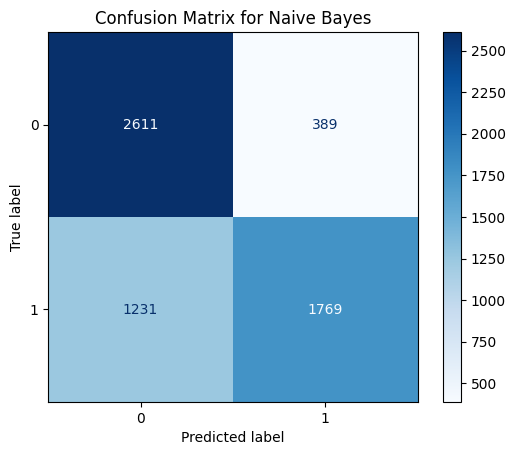

Model: Gradient Boosting
Accuracy: 0.86
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.83      0.85      3000
           1       0.84      0.88      0.86      3000

    accuracy                           0.86      6000
   macro avg       0.86      0.86      0.86      6000
weighted avg       0.86      0.86      0.86      6000



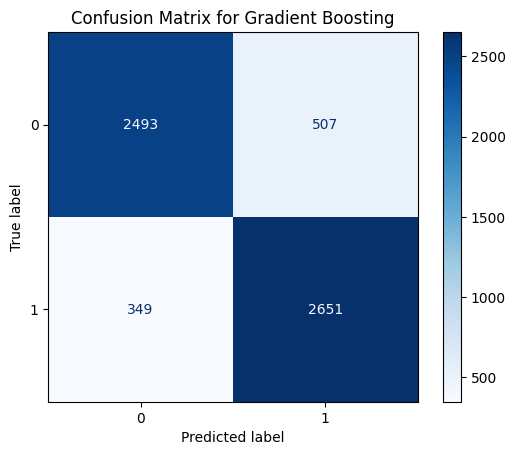

Model: AdaBoost
Accuracy: 0.84
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.82      0.83      3000
           1       0.83      0.85      0.84      3000

    accuracy                           0.84      6000
   macro avg       0.84      0.84      0.84      6000
weighted avg       0.84      0.84      0.84      6000



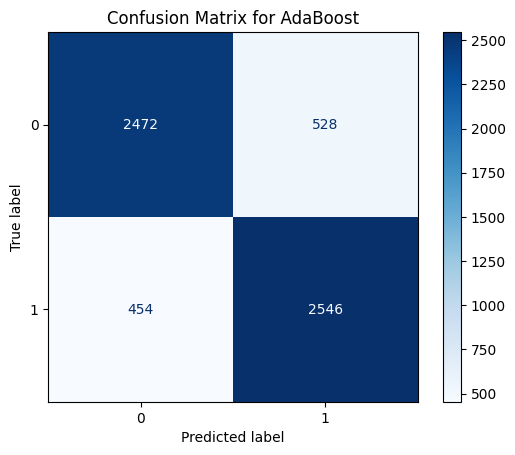

Model: Ridge Classifier
Accuracy: 0.49
Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.51      0.50      3000
           1       0.49      0.48      0.49      3000

    accuracy                           0.49      6000
   macro avg       0.49      0.49      0.49      6000
weighted avg       0.49      0.49      0.49      6000



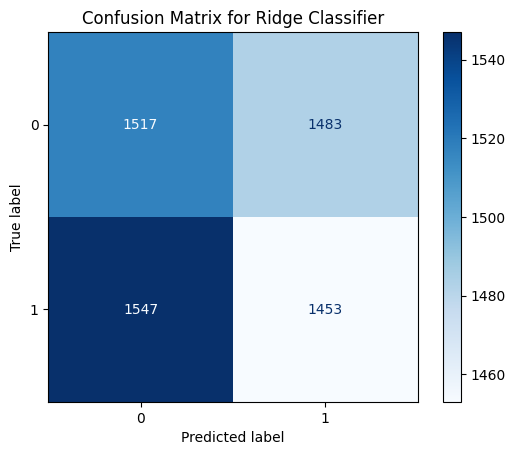

Model: XGBoost
Accuracy: 0.88
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.87      0.88      3000
           1       0.87      0.89      0.88      3000

    accuracy                           0.88      6000
   macro avg       0.88      0.88      0.88      6000
weighted avg       0.88      0.88      0.88      6000



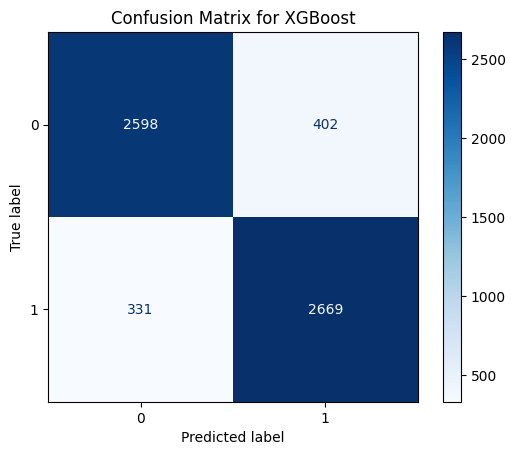

In [68]:
classifiers = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Classifier": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Ridge Classifier": RidgeClassifier(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
}
def train_and_evaluate_models(x_train, y_train, x_test, y_test):
    for model_name, model in classifiers.items():
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        accuracy = accuracy_score(y_test, y_pred)
        cm = confusion_matrix(y_test, y_pred)
        # Display results
        print(f"Model: {model_name}")
        print(f"Accuracy: {accuracy:.2f}")
        report = classification_report(y_test, y_pred)
        print("Classification Report:")
        print(report)
        # Plot confusion matrix
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y))
        disp.plot(cmap=plt.cm.Blues)
        plt.title(f'Confusion Matrix for {model_name}')
        plt.show()

# Run the function to train and evaluate all models
train_and_evaluate_models(x_train_scaled, y_train_downsampled, x_test_scaled, y_test)

Model: Stacking Model
Accuracy: 0.87
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.87      0.87      3000
           1       0.87      0.88      0.87      3000

    accuracy                           0.87      6000
   macro avg       0.87      0.87      0.87      6000
weighted avg       0.87      0.87      0.87      6000



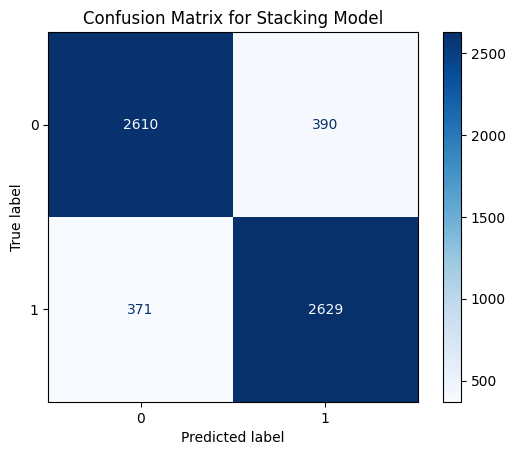

In [69]:
# Define the base classifiers (using Random Forest and others)
base_classifiers = [
    ('random_forest', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('adaboost', AdaBoostClassifier(n_estimators=100, random_state=42)),
    ('svc', SVC(probability=True, kernel='linear', random_state=42)),
    ('decision_tree', DecisionTreeClassifier(max_depth=5, random_state=42)),
    ('knn', KNeighborsClassifier(n_neighbors=5)),
    ('gradient_boost', GradientBoostingClassifier(n_estimators=100, random_state=42))
]

# Define the meta-classifier as XGBoost
meta_classifier = XGBClassifier(n_estimators=500, random_state=42, use_label_encoder=False, eval_metric='mlogloss')
    
# Create the StackingClassifier
stacking_clf = StackingClassifier(
        estimators=base_classifiers,
        final_estimator=meta_classifier,
        cv=5,  # Cross-validation for better generalization
        stack_method='predict_proba',  # Use probabilities as input to meta-classifier
        passthrough=True,
    )
    
# Train the stacking model
stacking_clf.fit(x_train_scaled, y_train_downsampled)
    
# Evaluate on the test set
y_pred = stacking_clf.predict(x_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
    
# Display model performance
model_name = "Stacking Model"
print(f"Model: {model_name}")
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(report)
    
# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
disp.plot(cmap=plt.cm.Blues)
plt.title(f'Confusion Matrix for {model_name}')
plt.show()